# Variogram modeling

In this tutorial, we illustrate one possible workflow for fitting variograms with GeoStats.jl.

Before we proceed, please instantiate the environment:

In [1]:
using Pkg
push!(empty!(LOAD_PATH), @__DIR__)
Pkg.instantiate()

In [2]:
using Random; Random.seed!(2017); # make sure this tutorial is reproducible

## The data

Let's consider a simple 2D problem in which properties of a field are sampled at random locations. We will be using an image of the Walker Lake in Nevada available in `GeoStatsImages.jl` as our field:

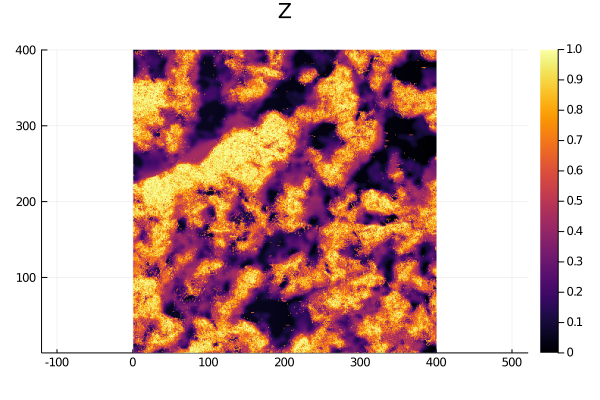

In [3]:
using GeoStats
using GeoStatsImages
using Plots

TI = training_image("WalkerLake")[:,:,1]

field = RegularGridData{Float64}(OrderedDict(:Z => TI))

plot(field)

We sample a thousand points from the image and plot them:

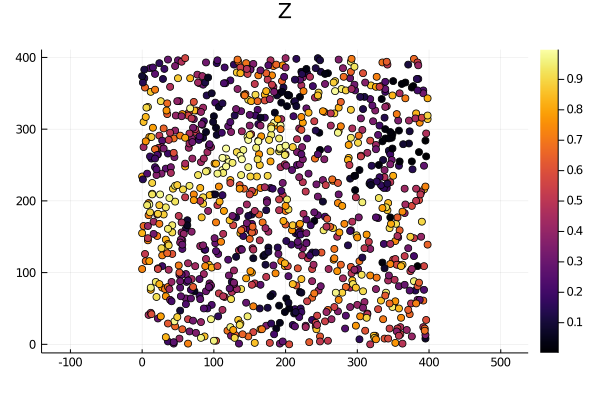

In [4]:
obs = sample(field, 1000)

plot(obs)

## Empirical variogram

We consider a simple omnidirectional variogram. Variogram objects in GeoStats.jl are integrated with the Julia Plots.jl framework. We can plot them directly and interact with the result as we vary the number of lags used for estimation:

In [5]:
using GeoStats
using Interact

@manipulate for nlags=1:30
    plot(EmpiricalVariogram(obs, :Z, nlags=nlags))
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8977592575793828935\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4326121974016488780\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8977592575793828935\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["nlags"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 30,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
15, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/juliohm/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/juliohm/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/juliohm/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/juliohm/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/juliohm/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f5c35631fc0, Task (runnable) @0x00007f5c35631fc0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\"],\"changes\":WebIO.getval({\"name\":\"

Besides the variogram itself, GeoStats.jl presents the bin counts (scaled) as a measure of confidence about the estimated points. This frequency plot can be deactived by passing the option `showbins=false` to the plot command. We encourage users to keep the bin counts option activated as it has zero cost.

This empirical variogram was constructed using the Euclidean distance between data locations. We can also specify a custom distance to estimate the variogram when points are embedded on different coordinate systems. Please consult the documentation for more distance functions.

After interacting with the plot, we select a number of lags and proceed to fitting a theoretical model:

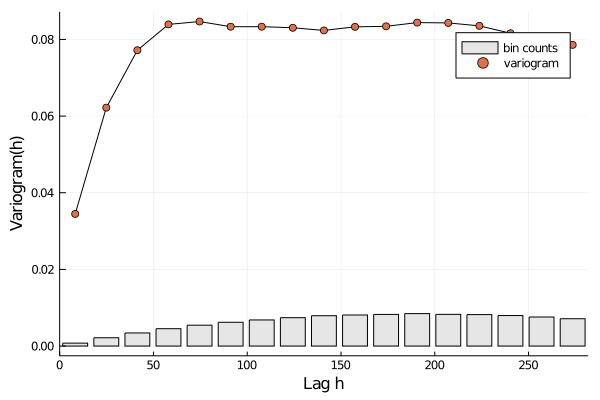

In [6]:
# final empirical variogram
γemp = EmpiricalVariogram(obs, :Z, nlags=17)

plot(γemp)

## Theoretical variogram

We will exploit the Interact.jl package again to fit a theoretical variogram to the data. Various theoretical variogram models are available in GeoStats.jl, including a composite additive model that can be used to combine different variogram types. Please consult the documentation for more details. Here we will use a simple spherical variogram:

In [7]:
@manipulate for s=range(0, stop=.1, length=50),
                r=range(0, stop=100., length=50),
                n=range(0, stop=.1, length=50)
    # theoretical variogram
    γtheo = SphericalVariogram(sill=s, range=r, nugget=n)

    plot(γemp)
    plot!(γtheo, maxlag=250., label="theoretical")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["s"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 50,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
25, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/juliohm/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/juliohm/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/juliohm/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/juliohm/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/juliohm/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f5c35630c40, Task (runnable) @0x00007f5c35630c40), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.00204082\",\"0.00408163\",\"0.00612245\",\"0.00816327\",\"0.0102041\",\"0.0122449\",\"0.0142857\",\"0.0163265\",\"0.0183673\",\"0.0204082\",\"0.022449\",\"0.0244898\",\"0.0265306\",\"0.0285714\",\"0.0306122\",\"0.0326531\",\"0.034693

After tuning the parameters of the theoretical variogram interactively, we plot the final result:

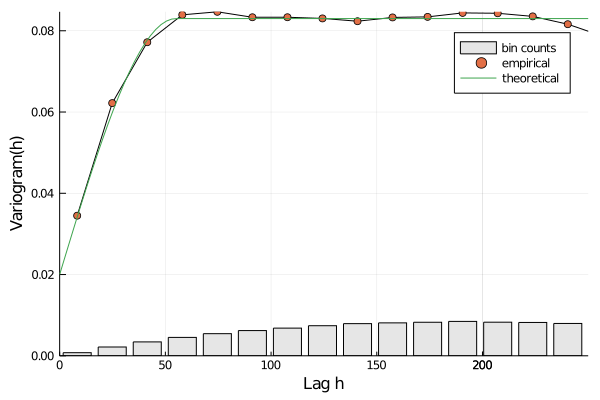

In [8]:
γtheo = SphericalVariogram(sill=0.083, range=55., nugget=0.02)

plot(γemp, label="empirical")
plot!(γtheo, maxlag=250., label="theoretical")

## Automatic fitting

An alternative option to interactive variogram modeling is automatic fitting. We can fit a specific theoretical variogram model with:

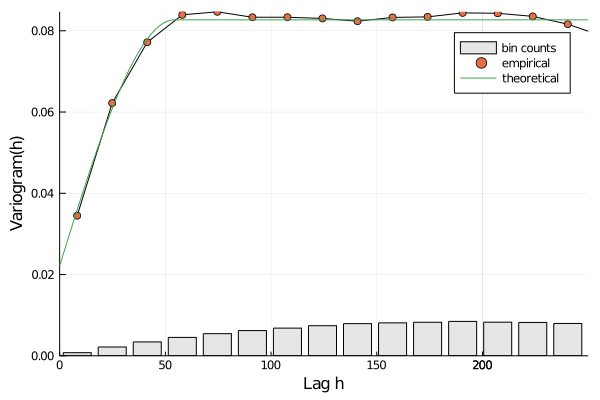

In [9]:
γtheo = fit(SphericalVariogram, γemp)

plot(γemp, label="empirical")
plot!(γtheo, maxlag=250., label="theoretical")

or let GeoStats.jl pick the model with minimum weighted least squares error by passing the super type `Variogram`:

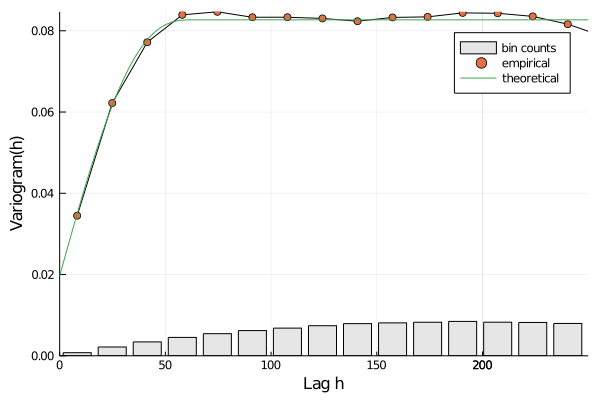

In [10]:
γtheo = fit(Variogram, γemp)

plot(γemp, label="empirical")
plot!(γtheo, maxlag=250., label="theoretical")

which in this example turns out to be:

In [11]:
γtheo

PentasphericalVariogram{Float64,Distances.Euclidean}
  range: Float64 63.2011564390704
  sill: Float64 0.08269788172850323
  nugget: Float64 0.019656268032981043
  distance: Distances.Euclidean


## Conclusions

- Variogram modeling is an important step in classical geostatistics. Some practioners prefer to model variograms interactively to enforce a specific type of spatial continuity, whereas others prefer to use automatic fitting procedures, which are guaranteed to minimize a given loss function.

- Both approaches are available in GeoStats.jl, and are useful under different circumstances.